In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

## EDA
### Some quick looking around

In [4]:
test_data.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
train_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [7]:
#overall churn rate
train_data[train_data.churn=='yes']['churn'].count()
print('Overall customer churn rate is', train_data[train_data.churn == 'yes']['churn'].count()/train_data.churn.count())

Overall customer churn rate is 0.14070588235294118


#### -Exploring churn rate for international plan holders vs non international plan holders:

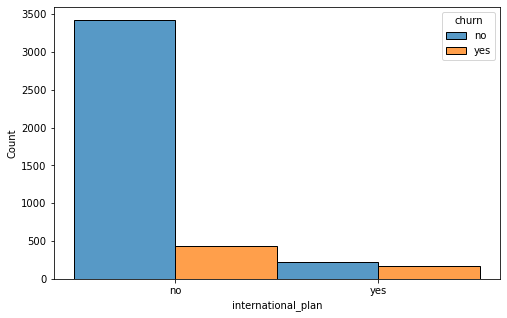

In [8]:
%matplotlib inline
#looks like rate of churn for international plans is very high, international plans also make up a very small portion of overall business. Should the focus be on improving it? Are there other areas of churn that would be more profitable to focus on?
a4_dims = (8, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(x=train_data.international_plan, hue='churn', data=train_data, multiple='dodge');

In [9]:
#churn counts by international plans
train_data[train_data.churn=='yes'].groupby('international_plan').churn.count().reset_index()

,international_plan,churn
0,no,431
1,yes,167


In [10]:
#churn rates for international and non international plan holders
train_data[train_data.churn=='yes'].groupby('international_plan').churn.count()/train_data.groupby('international_plan')['churn'].count()


international_plan
no     0.111832
yes    0.421717
Name: churn, dtype: float64

In [11]:
#intnl plan counts
train_data.international_plan.value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

In [12]:
train_data[train_data.international_plan=='yes']['international_plan'].count()/train_data.international_plan.count()

0.09317647058823529

(Findings for international_plan holder churn: 
167 of 396 customers with international plans churned. That's a high percentage (42%), especially compared with the 14% overall churn rate (and the 11% churn rate of non international plan holders).  Also, international plan holders account for a disproportionate 28% of churn since they only make up 9% of the total customer base)

### - Exploring churn rate for customers with voice mail plans

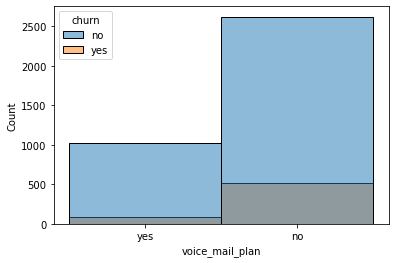

voice_mail_plan
no     0.164436
yes    0.073741
Name: churn, dtype: float64

In [13]:
#the churn rate for those with voice mail plans is double that of those without voice mail plans
sns.histplot(x= train_data.voice_mail_plan, hue='churn', data=train_data)
plt.show()
train_data[train_data.churn=='yes'].groupby('voice_mail_plan')['churn'].count()/train_data.groupby('voice_mail_plan').churn.count()

### - customer churn by total international charge

<AxesSubplot:xlabel='total_intl_charge', ylabel='Count'>

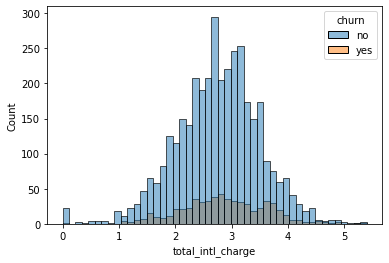

In [14]:
#churn based on total international charges
sns.histplot(x= train_data.total_intl_charge, hue='churn', data=train_data)

### - customer churn by number of customer service calls

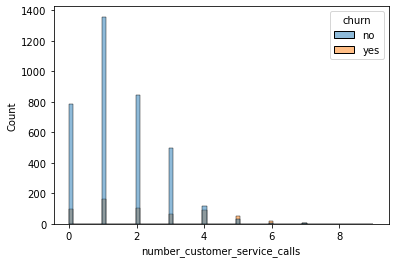

number_customer_service_calls
0    0.109481
1    0.108924
2    0.107709
3    0.112903
4    0.440191
5    0.604938
6    0.678571
7    0.538462
8    0.500000
9    1.000000
Name: churn, dtype: float64

In [15]:
#The vast majority of customers make less than 4 calls and the churn rate is about 10% for 0-3 service calls 
#churn for those that do make 4 calls or more jumps to 40% and the rate increases from there for subsequent service calls

sns.histplot(x = train_data.number_customer_service_calls, data=train_data, hue='churn')
plt.show();
#churn rates by number of service calls
train_data[train_data.churn == 'yes'].groupby('number_customer_service_calls')['churn'].count()/train_data.groupby('number_customer_service_calls')['churn'].count()
                                                                                                                  
                                                                                                                  

In [16]:

num_intnlHolder_service_calls = train_data[train_data.international_plan=='yes']['number_customer_service_calls'].value_counts()
total_num_service_calls = train_data.number_customer_service_calls.value_counts()
rate_intnl_serv_calls = num_intnlHolder_service_calls/total_num_service_calls
international_service_calls_df = pd.DataFrame({'num_intnlHolder_service_calls':num_intnlHolder_service_calls, 'total_num_service_calls':total_num_service_calls, 'rate_intnl_serv_calls':rate_intnl_serv_calls})
international_service_calls_df.index.name = 'num_service_calls'
international_service_calls_df
#service_call_rates 

## the international_plan holders don't account for a large portion of the overall service call amount for each number of service calls

,num_intnlHolder_service_calls,total_num_service_calls,rate_intnl_serv_calls
num_service_calls,,,
0,95.0,886,0.107223
1,139.0,1524,0.091207
2,76.0,947,0.080253
3,52.0,558,0.093190
4,22.0,209,0.105263
5,8.0,81,0.098765
6,2.0,28,0.071429
7,1.0,13,0.076923
8,NaN,2,NaN


## Prepare data for model training - create a baseline, get random forest feature importances

In [17]:
train_data['area_code'] =train_data['area_code'].str.replace(r'[^0-9]+', '').astype('int')
test_data['area_code'] =test_data['area_code'].str.replace(r'[^0-9]+', '').astype('int')
#'number_customer_service_calls','total_day_charge','total_eve_charge','total_intl_charge','total_night_charge','total_intl_calls',
 #'number_vmail_messages'

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   int64  
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [19]:
#encode churn col
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data['churn'] = le.fit_transform(train_data.churn)

#convert international_plan from categorical to dummy variables
train_data_dummies = pd.get_dummies(train_data, columns=['international_plan', 'voice_mail_plan'])
test_data_dummies = pd.get_dummies(test_data, columns=['international_plan', 'voice_mail_plan'])

In [20]:
cols = train_data_dummies.select_dtypes([np.number]).columns
train_data_num = train_data_dummies[cols]
test_data_num = test_data_dummies[[i for i in cols if i not in ['churn']]]

In [21]:
train_data_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   area_code                      4250 non-null   int64  
 2   number_vmail_messages          4250 non-null   int64  
 3   total_day_minutes              4250 non-null   float64
 4   total_day_calls                4250 non-null   int64  
 5   total_day_charge               4250 non-null   float64
 6   total_eve_minutes              4250 non-null   float64
 7   total_eve_calls                4250 non-null   int64  
 8   total_eve_charge               4250 non-null   float64
 9   total_night_minutes            4250 non-null   float64
 10  total_night_calls              4250 non-null   int64  
 11  total_night_charge             4250 non-null   float64
 12  total_intl_minutes             4250 non-null   f

In [22]:
X=train_data_num.drop('churn', axis=1)
y=train_data_num['churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, stratify=y)

## Run a random forest classifer to create baseline accuracy before adjusting data

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [24]:
y_pred_test = rfc.predict(X_test)
y_pred_test_data = rfc.predict(test_data_num)

In [25]:
y_pred_test_data = le.inverse_transform(y_pred_test_data)

In [26]:
y_pred_test_data[0:10]

array(['no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes'],
      dtype=object)

In [27]:

submission1 = pd.DataFrame({'id':test_data.id, 'churn':y_pred_test_data})
submission1.to_csv('submission1.csv', index=False)

In [28]:
submission1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      750 non-null    int64 
 1   churn   750 non-null    object
dtypes: int64(1), object(1)
memory usage: 11.8+ KB


In [29]:
accuracy_score(y_test, y_pred_test)

0.9510818438381938

In [30]:
#accuracy score looks great but since the classes are unbalanced, this score might not accurately reflect model performance
matrix = confusion_matrix(y_test, y_pred_test)
matrix

array([[905,   8],
       [ 44, 106]])

In [31]:
#use confusion matrix to more accurately assess model performance on the test set
matrix = matrix.astype('float') / matrix.sum(axis=1)
matrix

array([[0.99123768, 0.05333333],
       [0.04819277, 0.70666667]])

In [32]:
#normalize confusion matrix for easier understanding of model performance
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix

array([[0.94894236, 0.05105764],
       [0.06384337, 0.93615663]])

In [33]:
#get more insight into model performance with a classification report. Them model did well with non churn. It was careful not to label customers non churn if they were churn and it was also good at recall which meant that it labeled most of the non churn customers accurately.
#The model didn't do as well with churn customers. It was pretty accurate with the customers it did label as churn but it was too careful to not label as customers as churn even when they really were so it missed a lot.
#This brough down the f1-score for churn
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       913
           1       0.93      0.71      0.80       150

    accuracy                           0.95      1063
   macro avg       0.94      0.85      0.89      1063
weighted avg       0.95      0.95      0.95      1063



In [34]:
#This model gets a 94% accuracy rate from Kaggle (96% public score), slightly lower than the accuracy score
#Let's calculate cross val score to get another perspective on how the model is performing
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores=cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)'%(mean(scores), std(scores)))


Accuracy: 0.958 (0.012)


### Make adjustments to the data to improve model performance

#### Take a look at some of the features:

In [35]:
#take a look at how the non numerical data relates to churn

<AxesSubplot:xlabel='total_eve_minutes', ylabel='Count'>

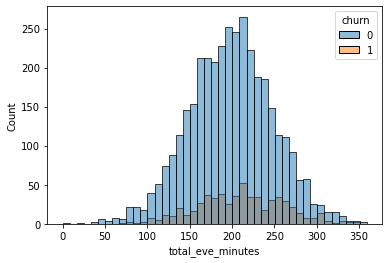

In [36]:
sns.histplot(x=train_data.total_eve_minutes, hue='churn', data=train_data)

In [37]:
#the churn rate is higher for customers with higher amount of evening minutes 
train_data['eve_cut'] = pd.cut(train_data.total_eve_minutes, 7)

churn_rate_byevemins = train_data[train_data.churn==1]['eve_cut'].value_counts()/train_data.eve_cut.value_counts()
churn_rate_byevemins
#train_data.eve_cut.value_counts()

(-0.359, 51.329]      0.000000
(51.329, 102.657]     0.072165
(102.657, 153.986]    0.114420
(153.986, 205.314]    0.123047
(205.314, 256.643]    0.153846
(256.643, 307.971]    0.195960
(307.971, 359.3]      0.228571
Name: eve_cut, dtype: float64

<AxesSubplot:xlabel='total_day_minutes', ylabel='Count'>

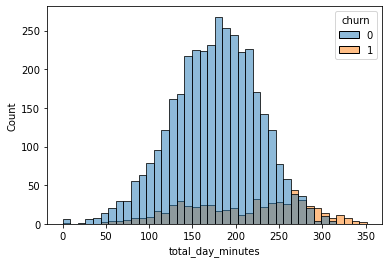

In [38]:
#churn by total_day_minutes
sns.histplot(x= train_data.total_day_minutes, hue='churn', data=train_data)

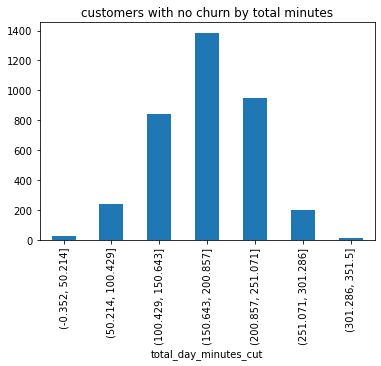

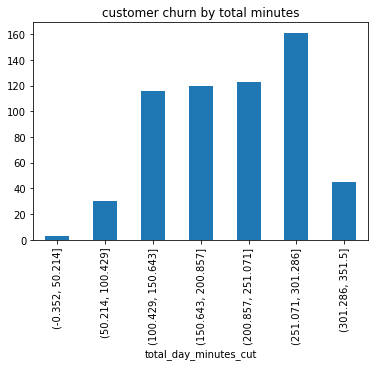

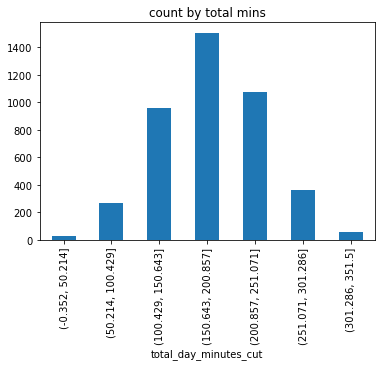

In [39]:
#churn rate is very high for total_day minutes of about 250 and above (even up to 82% for minutes above 350. Let's take a closer look at those numbers
#train_data[train_data.total_day_minutes > 300]['churn'].sum()/train_data[train_data.total_day_minutes > 300]['churn'].count() 
#train_data.total_day_minutes.value_counts()
train_data['total_day_minutes_cut'] = pd.cut(train_data.total_day_minutes, 7)
churnRatebyMin = train_data[train_data.churn == 1].total_day_minutes_cut.value_counts()/train_data['total_day_minutes_cut'].value_counts()
dfnochurn = train_data[train_data.churn==0].groupby('total_day_minutes_cut').total_day_minutes_cut.count()
dfchurn = train_data[train_data.churn==1].groupby('total_day_minutes_cut').total_day_minutes_cut.count()
dfcount = train_data.groupby('total_day_minutes_cut').total_day_minutes_cut.count()
dfnochurn.plot(kind='bar', title='customers with no churn by total minutes')
plt.show()
dfchurn.plot(kind='bar', title='customer churn by total minutes')
plt.show()
dfcount.plot(kind='bar', title='count by total mins')
plt.show()

#### Examine feature importances:

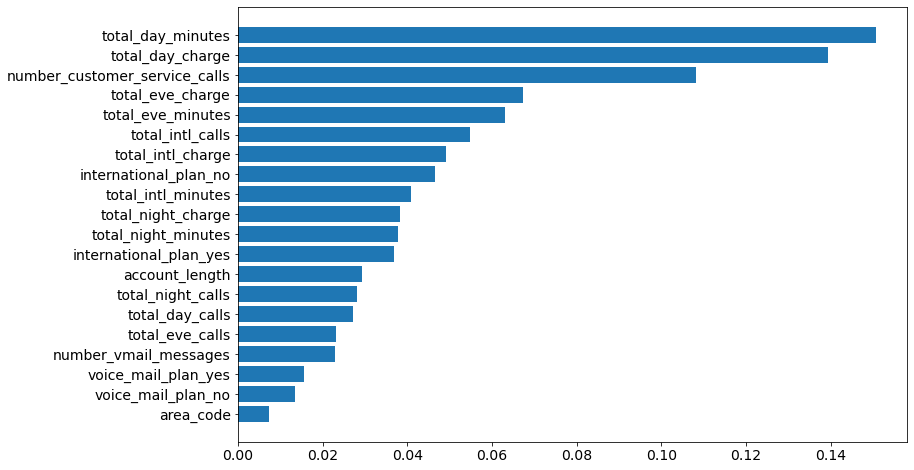

In [40]:
sorted_idx = rfc.feature_importances_.argsort()
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
plt.barh(X_train.columns[sorted_idx], rfc.feature_importances_[sorted_idx]);

In [41]:
#feature importances from .corr() method match up with feature importances from random forest 
dfcorr = train_data.corr()
dfcorr['churn'].sort_values(ascending=False)


churn                            1.000000
number_customer_service_calls    0.221220
total_day_minutes                0.215272
total_day_charge                 0.215263
total_eve_minutes                0.078855
total_eve_charge                 0.078852
total_intl_minutes               0.055186
total_intl_charge                0.055177
total_night_minutes              0.046647
total_night_charge               0.046641
account_length                   0.019378
area_code                        0.015964
total_day_calls                  0.011640
total_eve_calls                 -0.006817
total_night_calls               -0.012699
total_intl_calls                -0.034334
number_vmail_messages           -0.100347
Name: churn, dtype: float64

### Drop features that are highly correlated with each other in order to improve model performance - these include total_eve_minutes, total_day_minutes, total_intnl_minutes, total_night_minutes

In [42]:
c = dfcorr.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so[so>.9]

total_intl_charge              total_intl_minutes               0.999993
total_intl_minutes             total_intl_charge                0.999993
total_night_minutes            total_night_charge               0.999999
total_night_charge             total_night_minutes              0.999999
total_eve_charge               total_eve_minutes                1.000000
total_eve_minutes              total_eve_charge                 1.000000
total_day_charge               total_day_minutes                1.000000
total_day_minutes              total_day_charge                 1.000000
account_length                 account_length                   1.000000
total_eve_charge               total_eve_charge                 1.000000
total_intl_charge              total_intl_charge                1.000000
total_intl_calls               total_intl_calls                 1.000000
total_intl_minutes             total_intl_minutes               1.000000
total_night_charge             total_night_charge  

In [43]:
X_train_d = X_train.drop(['total_eve_charge', 'total_day_charge', 'total_intl_charge', 'total_night_charge'], axis=1)
X_test_d = X_test.drop(['total_eve_charge', 'total_day_charge', 'total_intl_charge', 'total_night_charge'], axis=1)
test_data_d = test_data_num.drop(['total_eve_charge', 'total_day_charge', 'total_intl_charge', 'total_night_charge'], axis=1)

#### Let's only use features with the top correlation and feature scores

In [44]:
d = dfcorr['churn'].sort_values(ascending=False)
dl = d[abs(d)<.03].index.to_list()
len(dl)
print(dl)

['account_length', 'area_code', 'total_day_calls', 'total_eve_calls', 'total_night_calls']


In [45]:
#take the columns that were already removed out of the list
a = ['total_eve_minutes', 'total_day_minutes', 'total_intl_minutes', 'total_night_minutes']
b = [x for x in dl if x not in a]
b

['account_length',
 'area_code',
 'total_day_calls',
 'total_eve_calls',
 'total_night_calls']

In [46]:
X_train_dl = X_train_d.drop(b, axis=1)
X_test_dl = X_test_d.drop(b, axis=1)
test_data_dl = test_data_d.drop(b, axis=1)

In [47]:
X_train_dl.head()

,number_vmail_messages,total_day_minutes,total_eve_minutes,total_night_minutes,total_intl_minutes,total_intl_calls,number_customer_service_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
2599,34,192.3,129.3,136.3,6.3,12,1,1,0,0,1
3370,0,254.8,153.5,217.6,9.0,4,1,1,0,1,0
2708,29,211.1,223.5,148.4,9.7,9,2,1,0,0,1
1,0,243.4,121.2,162.6,12.2,5,0,1,0,1,0
3986,0,182.6,145.2,162.6,12.0,1,6,1,0,1,0


In [48]:
## retry model with new feature list
rfc2 = RandomForestClassifier(n_estimators=500, random_state=1)
rfc2.fit(X_train_dl, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [49]:
y_pred_test2 = rfc2.predict(X_test_dl)
y_pred_test_data2 = rfc2.predict(test_data_dl)
y_pred_test_data2
y_pred_test_data2 = le.inverse_transform(y_pred_test_data2)

submission2 = pd.DataFrame({'id':test_data.id, 'churn':y_pred_test_data2})
submission2.to_csv('submission2.csv', index=False)
submission2.head()


,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no


In [50]:
accuracy_score(y_test, y_pred_test2)

0.9548447789275635

In [51]:
matrix = confusion_matrix(y_test, y_pred_test2)
matrix

array([[902,  11],
       [ 37, 113]])

In [52]:
matrix = matrix.astype('float') / matrix.sum(axis=1)
matrix

array([[0.98795181, 0.07333333],
       [0.04052574, 0.75333333]])

In [53]:
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix

array([[0.93090138, 0.06909862],
       [0.05104903, 0.94895097]])

In [54]:
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       913
           1       0.91      0.75      0.82       150

    accuracy                           0.95      1063
   macro avg       0.94      0.87      0.90      1063
weighted avg       0.95      0.95      0.95      1063



In [55]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores=cross_val_score(rfc, X_train_dl, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)'%(mean(scores), std(scores)))


Accuracy: 0.959 (0.012)


In [56]:
#try other models out

In [57]:
X_train_dl.columns

Index(['number_vmail_messages', 'total_day_minutes', 'total_eve_minutes',
       'total_night_minutes', 'total_intl_minutes', 'total_intl_calls',
       'number_customer_service_calls', 'international_plan_no',
       'international_plan_yes', 'voice_mail_plan_no', 'voice_mail_plan_yes'],
      dtype='object')

In [66]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
xgc = xgb.XGBClassifier(objective= 'binary:logistic',
    nthread=4,
    seed=42)


parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=xgc,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)
grid_search.fit(X_train_dl, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=42,
                                     subsample=No

In [67]:
xgc_best = grid_search.best_estimator_

In [68]:
y_pred_xgc = xgc_best.predict(X_test_dl)
y_pred_test_xgc = xgc_best.predict(test_data_dl)

y_pred_test_xgc = le.inverse_transform(y_pred_test_xgc)

submission3 = pd.DataFrame({'id':test_data.id, 'churn':y_pred_test_xgc})
submission3.to_csv('submission3.csv', index=False)
submission3.head()

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no


In [69]:
accuracy_score(y_test, y_pred_xgc)

0.955785512699906

In [70]:
from sklearn.preprocessing import StandardScaler


In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_dl, y_train)
lr_predTest = lr.predict(X_test_dl)
lr_pred = lr.predict(test_data_dl)
lr_pred = le.inverse_transform(lr_pred)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
submission4 = pd.DataFrame({'id':test_data.id, 'churn':lr_pred})
submission4.to_csv('submission4.csv', index=False)
submission4.head()

,id,churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no


### Findings

The model was able to predict churn with 94% accuracy using an XGBoost classifier model. This information is extremely useful as it helps to provide insight into the cause of churn, identify which customers are most likely to churn and hopefully be able to change and improve the factors that are most likely associated with customers leaving. The factors that ranked highest when predicting customer churn for Telco were total of day and evening minutes and number of customer service calls.

Predicting churn is also very useful in other profit maximizing efforts as it allows companies to have a better feel for what customer demand should look like and allows them to make more informed decisions about hiring, expected inventory requirements and if it makes sense for them to take advantage of bulk discounts, etc 